In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
#engine = create_engine("sqlite:///Resources/hawaii.sqlite")
engine = create_engine("sqlite:////Users/Zorro/Desktop/SMU Homework Solved/10 Advanced Data and Storage Retrieval/Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Climate Analysis

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

# Perform a query to retrieve the data and precipitation scores

# Save the query results as a Pandas DataFrame and set the index to the date column

# Sort the dataframe by date

# Use Pandas Plotting with Matplotlib to plot the data


In [11]:
# save  a reference to 'measurement' and 'station' classes
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores
prcp_by_date = session.query(Measurement.date, Measurement.prcp).\
             filter(Measurement.date>'2017-01-01').\
             order_by(Measurement.date).all()
prcp_by_date

[('2017-01-02', 0.0),
 ('2017-01-02', 0.0),
 ('2017-01-02', 0.01),
 ('2017-01-02', 0.01),
 ('2017-01-02', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-03', None),
 ('2017-01-03', 0.0),
 ('2017-01-03', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-04', 0.18),
 ('2017-01-04', 0.0),
 ('2017-01-04', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-05', 0.0),
 ('2017-01-05', 0.42),
 ('2017-01-05', 0.06),
 ('2017-01-05', 0.47),
 ('2017-01-06', 0.0),
 ('2017-01-06', 0.0),
 ('2017-01-06', 0.59),
 ('2017-01-06', 0.01),
 ('2017-01-06', 0.1),
 ('2017-01-06', 0.1),
 ('2017-01-07', 0.0),
 ('2017-01-07', 0.06),
 ('2017-01-07', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-07', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-08', 0.03),
 ('2017-01-08', 0.0),
 ('2017-01-08', 0.0),
 ('2017-01-08', 0.03),
 ('2017-01-09', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-09', 0.0),
 ('2017-01-09', None

In [19]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
df = pd.DataFrame(prcp_by_date)
df.head()

,date,prcp
0,2017-01-02,0.00
1,2017-01-02,0.00
2,2017-01-02,0.01
3,2017-01-02,0.01
4,2017-01-02,0.00


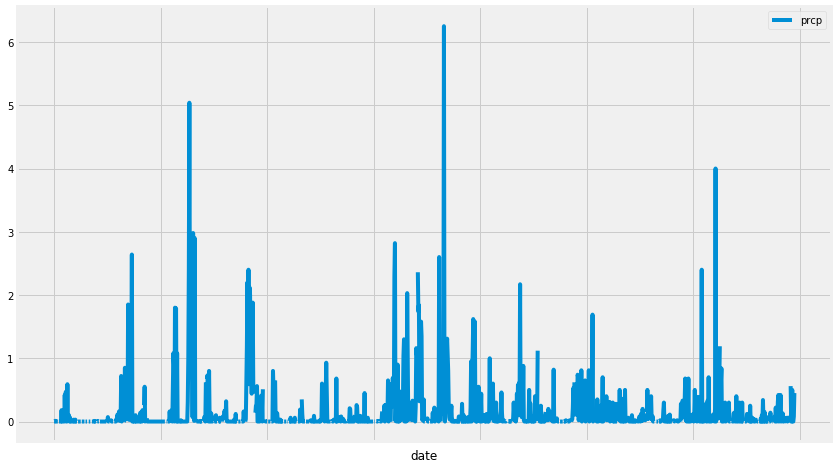

In [32]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x="date",y="prcp",kind="line",grid=True,figsize=(13,8))

![precipitation](Images/precipitation.png)

In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
summary_statistics = df.describe()
summary_statistics

,prcp
count,1262.000000
mean,0.166307
std,0.454718
min,0.000000
25%,0.000000
50%,0.000000
75%,0.107500
max,6.250000


![describe](Images/describe.png)

In [22]:
# Design a query to show how many stations are available in this dataset?
total_stations = session.query(func.count(Station.station)).all()
total_stations

[(9)]

In [36]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [37]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
most_active = session.query(func.min(Measurement.tobs),
                            func.max(Measurement.tobs),
                            func.avg(Measurement.tobs)).\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_active

(54.0, 85.0, 71.66378066378067)

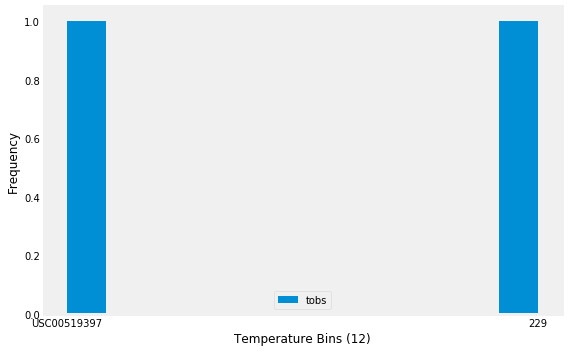

In [121]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp_year = session.query(Measurement.station, func.count(Measurement.station)).\
              filter(Measurement.date > '2017-01-01').\
              group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

temp_year
plt.subplots(figsize=(8,5))
plt.hist(x = temp_year, bins = 12)
plt.xlabel('Temperature Bins (12)', fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid()
labels = ['tobs']
plt.legend(labels)
plt.tight_layout()
plt.show()

![precipitation](Images/station-histogram.png)

In [43]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [44]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
def calc_temps(start_date, end_date):
    temp_stats = session.query(func.min(Measurement.tobs),func.avg(Measurement.tobs),func.max(Measurement.tobs)).\
                 filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    return temp_stats
temp_stats_list = calc_temps('2012-02-28', '2012-03-05')
print(temp_stats_list)


[(62.0, 69.57142857142857, 74.0)]


In [85]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
rainfall = session.query(Station.station,
                  func.sum(Measurement.prcp),
                  Station.name,
                  Station.elevation,                                    
                  Station.latitude,
                  Station.longitude)\
.filter(Measurement.station == Station.station)\
.filter(Measurement.date>='2016-01-01')\
.filter(Measurement.date<='2017-01-01').\
group_by(Measurement.station).all()


rainfall

[('USC00513117',
  52.440000000000026,
  'KANEOHE 838.1, HI US',
  14.6,
  21.4234,
  -157.8015),
 ('USC00514830',
  27.29,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  7.0,
  21.5213,
  -157.8374),
 ('USC00516128',
  162.91000000000003,
  'MANOA LYON ARBO 785.2, HI US',
  152.4,
  21.3331,
  -157.8025),
 ('USC00517948',
  2.9700000000000006,
  'PEARL CITY, HI US',
  11.9,
  21.3934,
  -157.9751),
 ('USC00519281',
  79.92,
  'WAIHEE 837.5, HI US',
  32.9,
  21.45167,
  -157.84888999999998),
 ('USC00519397', 16.15, 'WAIKIKI 717.2, HI US', 3.0, 21.2716, -157.8168),
 ('USC00519523',
  30.76999999999999,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  19.5,
  21.33556,
  -157.71139)]